In [175]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [121]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [122]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [123]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [124]:
columns = inspector.get_columns('measurement')
for column in columns:
    print (column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [127]:
for column_name in columns:
    print (column_name["name"])

id
station
date
prcp
tobs


## D1: Determine the Summary Statistics for June

In [147]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results=[]
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [148]:
#  3. Convert the June temperatures to a list.
temps_june = list(results)
temps_june

[(78.0,),
 (76.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (82.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (73.0,),
 (70.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (73.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),


In [149]:
len(results)

1700

In [150]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temps_df = pd.DataFrame(results)
temps_df.columns = ['June Temps']
temps_df.head()

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [151]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [152]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results=[]
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [153]:
# 7. Convert the December temperatures to a list.
temps_dec = list(results)
temps_dec

[(76.0,),
 (74.0,),
 (74.0,),
 (64.0,),
 (64.0,),
 (67.0,),
 (77.0,),
 (66.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (74.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (75.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (73.0,),
 (73.0,),
 (77.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (70.0,),
 (73.0,),
 (69.0,),
 (74.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (70.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (63.0,),
 (65.0,),
 (71.0,),
 (76.0,),
 (70.0,),
 (76.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (64.0,),
 (66.0,),
 (73.0,),
 (72.0,),
 (65.0,),
 (64.0,),
 (69.0,),
 (68.0,),
 (77.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (70.0,),
 (72.0,),
 (76.0,),
 (75.0,),
 (69.0,),
 (71.0,),
 (71.0,),


In [154]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(temps_dec)
dec_temps_df.columns = ['December Temps']
dec_temps_df.head()

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [155]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [210]:
columns = inspector.get_columns('station')
for column_name in columns:
    print (column_name["name"])

id
station
name
latitude
longitude
elevation


In [157]:
# Query for precipitation in June
results=[]
results = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
june_prcp = list(results)
june_prcp

[(0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.02,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.07,),
 (0.0,),
 (0.56,),
 (0.89,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.05,),
 (0.06,),
 (0.07,),
 (None,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.01,),
 (0.0,),
 (0.02,),
 (0.02,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (None,),
 (None,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.15,),
 (0.01,),
 (0.0,),
 (0.05,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.37,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.04,),
 (0.12,),
 (0.04,),
 

In [160]:
# Convert to dataframe
june_prcp_df = pd.DataFrame(june_prcp)
june_prcp_df.columns = ["June Precipitation"]
june_prcp_df

,June Precipitation
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


In [162]:
# June rainfall statistics
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [170]:
# Query for precipitation in December
results=[]
results = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
dec_prcp = list(results)
dec_prcp

[(0.04,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (1.58,),
 (0.77,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (1.4,),
 (0.0,),
 (0.0,),
 (None,),
 (0.13,),
 (0.55,),
 (0.06,),
 (0.01,),
 (0.0,),
 (0.03,),
 (0.08,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.13,),
 (0.07,),
 (0.07,),
 (0.08,),
 (0.4,),
 (0.7,),
 (0.0,),
 (0.01,),
 (0.07,),
 (0.02,),
 (0.15,),
 (0.02,),
 (0.18,),
 (0.03,),
 (0.04,),
 (0.1,),
 (0.03,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.2,),
 (0.01,),
 (None,),
 (None,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.14,),
 (0.09,),
 (0.01,),
 (0.02,),
 (0.02,),
 (0.12,),
 (0.0,),
 (0.1,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.04,),
 (0.0,),
 (2.01,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.0,),
 (0.0,),
 (0.02,),
 (0.0,),
 (0.0,),
 (1.1,),
 (0.02,),
 (0.0,),
 (0.16,),
 (0.09,),
 (0.

In [172]:
# Convert to dataframe
dec_prcp_df = pd.DataFrame(dec_prcp)
dec_prcp_df.columns = ["December Precipitation"]
dec_prcp_df

,December Precipitation
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00
...,...
1512,0.14
1513,0.14
1514,1.03
1515,2.37


In [173]:
# December rainfall statistics
dec_prcp_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


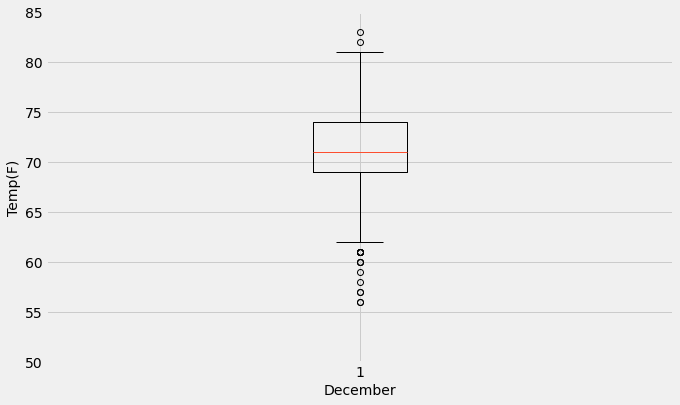

In [206]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylabel("Temp(F)", fontsize = 14)
ax.set_xlabel("December", fontsize = 14)
ax.boxplot(dec_temps_df)
ax.set_yticks(np.arange(50,90, step=5.0))
plt.show()

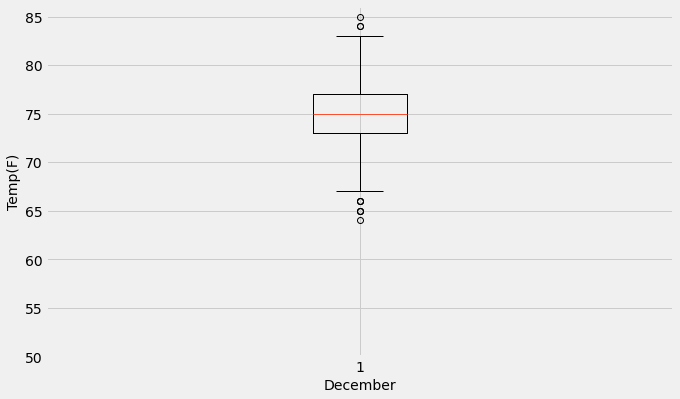

In [207]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylabel("Temp(F)", fontsize = 14)
ax.set_xlabel("December", fontsize = 14)
ax.boxplot(temps_df)
ax.set_yticks(np.arange(50,90, step=5.0))
plt.show()